## **1. Import libraries**

In [1]:
! pip install lazypredict

  Using cached click-8.1.8-py3-none-any.whl.metadata (2.3 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached jinja2-3.1.6-py3-none-any.whl.metadata (2.9 kB)
  Using cached cachetools-5.5.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached werkzeug-3.1.3-py3-none-any.whl.metadata (3.7 kB)
  Using cached itsdangerous-2.2.0-py3-none-any.whl.metadata (1.9 kB)
  Using cached blinker-1.9.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached Deprecated-1.2.18-py2.py3-none-any.whl.metadata (5.7 kB)
  Using cached annotated_types-0.7.0-py3-none-any.whl.metadata (15 kB)
  Using cached typing_inspection-0.4.0-py3-none-any.whl.metadata (2.6 kB)
  Using cached h11-0.14.0-py3-none-any.whl.metadata (8.2 kB)
  Using cached sniffio-1.3.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached pyasn1-0.6.1-py3-none-any.whl.metadata (8.4 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 28.2/28.2 MB 12.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.1/6.1 MB 

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyRegressor

## **2. Load the data set**


In [2]:
df = pd.read_csv('data/acetylcholinesterase_06_bioactivity_data_3class_pIC50_pubchem_fp.csv')

In [3]:
X = df.drop('pIC50', axis=1)
Y = df.pIC50

## **3. Data pre-processing**

In [4]:
# Examine X dimension
X.shape

(6641, 881)

In [5]:
# Remove low variance features
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8 * (1 - .8)))    
X = selection.fit_transform(X)
X.shape

(6641, 144)

In [6]:
# Perform data splitting using 80/20 ratio
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

## **4. Compare ML algorithms**

In [7]:
# Defines and builds the lazyclassifier
clf = LazyRegressor(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, Y_train, Y_train)
models_test,predictions_test = clf.fit(X_train, X_test, Y_train, Y_test)

  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 5312, number of used features: 144
[LightGBM] [Info] Start training from score 5.812101
'tuple' object has no attribute '__name__'
Invalid Regressor(s)


  0%|          | 0/42 [00:00<?, ?it/s]

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001894 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 432
[LightGBM] [Info] Number of data points in the train set: 5312, number of used features: 144
[LightGBM] [Info] Start training from score 5.812101


In [8]:
# Performance table of the training set (80% subset)
predictions_train

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
DecisionTreeRegressor,0.83,0.83,0.63,0.06
ExtraTreeRegressor,0.83,0.83,0.63,0.06
ExtraTreesRegressor,0.83,0.83,0.63,3.91
GaussianProcessRegressor,0.83,0.83,0.63,35.40
RandomForestRegressor,0.78,0.78,0.73,2.79
BaggingRegressor,0.75,0.76,0.76,0.29
XGBRegressor,0.75,0.75,0.78,0.13
MLPRegressor,0.70,0.71,0.84,2.58
HistGradientBoostingRegressor,0.54,0.55,1.04,1.23


In [9]:
# Performance table of the test set (20% subset)
predictions_test

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
HistGradientBoostingRegressor,0.32,0.39,1.21,1.13
LGBMRegressor,0.31,0.39,1.21,0.32
RandomForestRegressor,0.28,0.36,1.24,2.74
SVR,0.28,0.36,1.24,3.00
NuSVR,0.27,0.35,1.25,2.25
XGBRegressor,0.26,0.34,1.26,0.13
BaggingRegressor,0.24,0.32,1.28,0.29
GradientBoostingRegressor,0.22,0.30,1.30,0.99
KNeighborsRegressor,0.20,0.29,1.31,0.15


## **5. Data visualization of model performance**

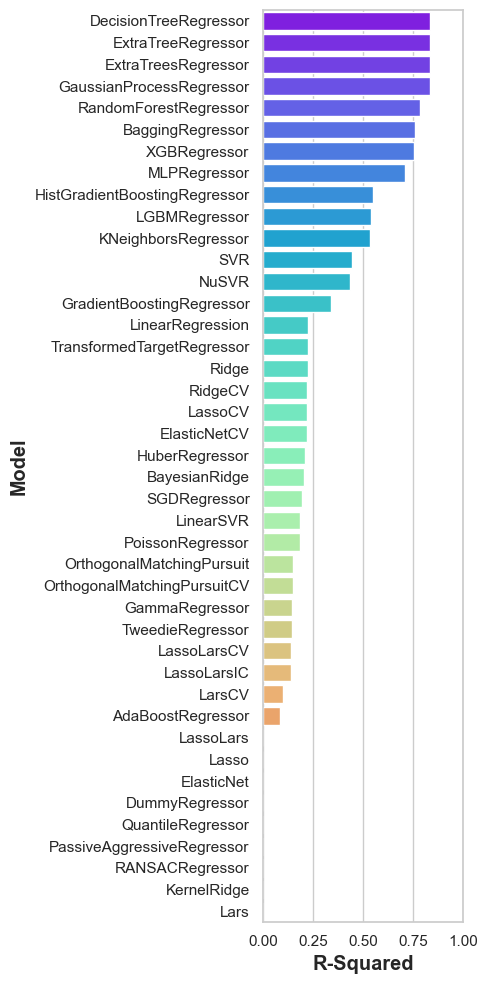

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Set up
plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")

# Generate a rainbow palette with the same number of colors as bars
colors = plt.cm.rainbow(np.linspace(0, 1, len(predictions_train)))

# Create barplot with custom rainbow colors
ax = sns.barplot(
    y=predictions_train.index,
    x="R-Squared",
    data=predictions_train,
    palette=colors
)

ax.set(xlim=(0, 1))
ax.set_xlabel("R-Squared", fontsize='large', fontweight='bold')
ax.set_ylabel("Model", fontsize='large', fontweight='bold')
plt.tight_layout()
plt.show()


[(0.0, 10.0)]

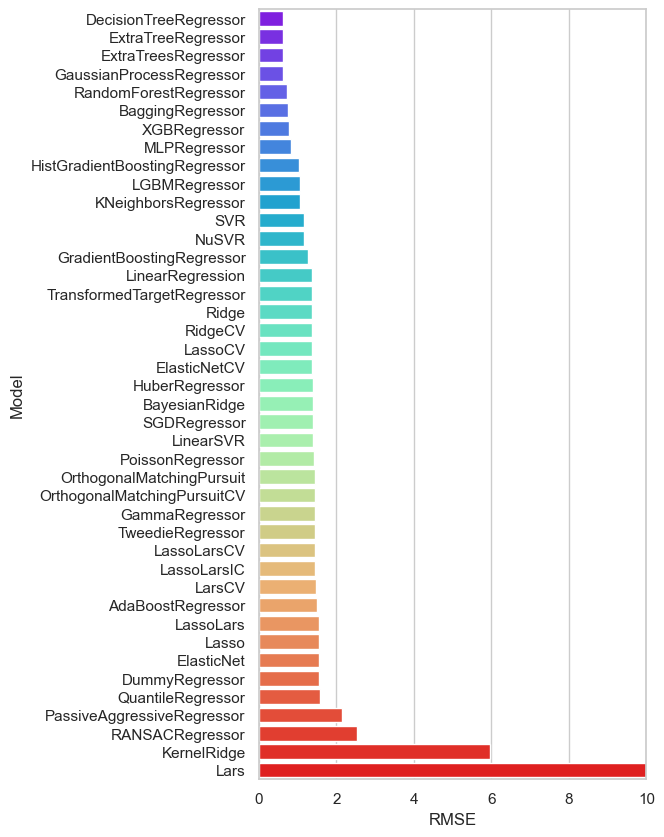

In [14]:
# Bar plot of RMSE values
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, palette = colors, x="RMSE", data=predictions_train)
ax.set(xlim=(0, 10))

[(0.0, 10.0)]

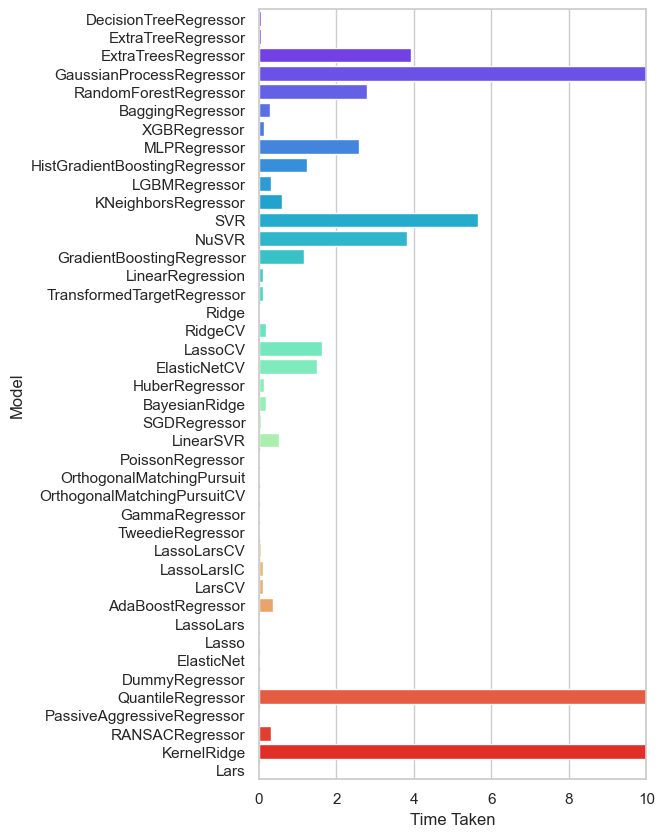

In [15]:
# Bar plot of calculation time
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=predictions_train.index, palette = colors, x="Time Taken", data=predictions_train)
ax.set(xlim=(0, 10))